In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:
train_dir = r"C:\Users\SKNJ12\OneDrive\Desktop\dataminning\train"
test_dir  = r"C:\Users\SKNJ12\OneDrive\Desktop\dataminning\test"

img_size = 48
batch_size = 64
epochs = 60


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training",
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6),
    ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)
]


In [18]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)


Epoch 1/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.2127 - loss: 1.8689

359/359 ━━━━━━━━━━━━━━━━━━━━ 242s 672ms/step - accuracy: 0.2249 - loss: 1.8468 - val_accuracy: 0.2468 - val_loss: 1.8079 - learning_rate: 1.0000e-04
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2388 - loss: 1.8121

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.2513 - loss: 1.7972 - val_accuracy: 0.2763 - val_loss: 1.7635 - learning_rate: 1.0000e-04
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2737 - loss: 1.7703

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.2782 - loss: 1.7642 - val_accuracy: 0.3059 - val_loss: 1.7341 - learning_rate: 1.0000e-04
Epoch 4/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2942 - loss: 1.7409

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3014 - loss: 1.7327 - val_accuracy: 0.3200 - val_loss: 1.7095 - learning_rate: 1.0000e-04
Epoch 5/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3082 - loss: 1.7191

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3146 - loss: 1.7092 - val_accuracy: 0.3407 - val_loss: 1.6814 - learning_rate: 1.0000e-04
Epoch 6/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3309 - loss: 1.6896

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3300 - loss: 1.6900 - val_accuracy: 0.3527 - val_loss: 1.6645 - learning_rate: 1.0000e-04
Epoch 7/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3371 - loss: 1.6737

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.3384 - loss: 1.6757 - val_accuracy: 0.3546 - val_loss: 1.6439 - learning_rate: 1.0000e-04
Epoch 8/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3556 - loss: 1.6545

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.3563 - loss: 1.6495 - val_accuracy: 0.3642 - val_loss: 1.6257 - learning_rate: 1.0000e-04
Epoch 9/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3610 - loss: 1.6302

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3635 - loss: 1.6312 - val_accuracy: 0.3667 - val_loss: 1.6098 - learning_rate: 1.0000e-04
Epoch 10/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3688 - loss: 1.6188

359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.3707 - loss: 1.6143 - val_accuracy: 0.3904 - val_loss: 1.5849 - learning_rate: 1.0000e-04
Epoch 11/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.3794 - loss: 1.5993 - val_accuracy: 0.3863 - val_loss: 1.5667 - learning_rate: 1.0000e-04
Epoch 12/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3787 - loss: 1.5904

359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.3854 - loss: 1.5831 - val_accuracy: 0.3994 - val_loss: 1.5514 - learning_rate: 1.0000e-04
Epoch 13/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3944 - loss: 1.5779

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.3947 - loss: 1.5708 - val_accuracy: 0.4017 - val_loss: 1.5365 - learning_rate: 1.0000e-04
Epoch 14/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4025 - loss: 1.5517

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4023 - loss: 1.5515 - val_accuracy: 0.4106 - val_loss: 1.5261 - learning_rate: 1.0000e-04
Epoch 15/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4075 - loss: 1.5461

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4037 - loss: 1.5433 - val_accuracy: 0.4224 - val_loss: 1.5080 - learning_rate: 1.0000e-04
Epoch 16/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4178 - loss: 1.5298

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4178 - loss: 1.5227 - val_accuracy: 0.4250 - val_loss: 1.4945 - learning_rate: 1.0000e-04
Epoch 17/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4197 - loss: 1.5112

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4175 - loss: 1.5144 - val_accuracy: 0.4264 - val_loss: 1.4937 - learning_rate: 1.0000e-04
Epoch 18/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4220 - loss: 1.5040

359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.4216 - loss: 1.5027 - val_accuracy: 0.4341 - val_loss: 1.4776 - learning_rate: 1.0000e-04
Epoch 19/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4255 - loss: 1.4987

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4266 - loss: 1.4976 - val_accuracy: 0.4351 - val_loss: 1.4616 - learning_rate: 1.0000e-04
Epoch 20/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4394 - loss: 1.4751

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.4332 - loss: 1.4828 - val_accuracy: 0.4438 - val_loss: 1.4480 - learning_rate: 1.0000e-04
Epoch 21/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4410 - loss: 1.4699 - val_accuracy: 0.4428 - val_loss: 1.4532 - learning_rate: 1.0000e-04
Epoch 22/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4378 - loss: 1.4735

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4388 - loss: 1.4684 - val_accuracy: 0.4545 - val_loss: 1.4323 - learning_rate: 1.0000e-04
Epoch 23/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4445 - loss: 1.4564 - val_accuracy: 0.4522 - val_loss: 1.4288 - learning_rate: 1.0000e-04
Epoch 24/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4480 - loss: 1.4466

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4490 - loss: 1.4451 - val_accuracy: 0.4586 - val_loss: 1.4186 - learning_rate: 1.0000e-04
Epoch 25/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4485 - loss: 1.4393

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.4510 - loss: 1.4373 - val_accuracy: 0.4605 - val_loss: 1.4124 - learning_rate: 1.0000e-04
Epoch 26/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4522 - loss: 1.4347

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.4574 - loss: 1.4284 - val_accuracy: 0.4659 - val_loss: 1.4017 - learning_rate: 1.0000e-04
Epoch 27/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4616 - loss: 1.4232

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.4635 - loss: 1.4177 - val_accuracy: 0.4715 - val_loss: 1.3956 - learning_rate: 1.0000e-04
Epoch 28/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4610 - loss: 1.4111 - val_accuracy: 0.4640 - val_loss: 1.4010 - learning_rate: 1.0000e-04
Epoch 29/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4630 - loss: 1.4062 - val_accuracy: 0.4673 - val_loss: 1.3829 - learning_rate: 1.0000e-04
Epoch 30/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4712 - loss: 1.4030

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4743 - loss: 1.3962 - val_accuracy: 0.4799 - val_loss: 1.3800 - learning_rate: 1.0000e-04
Epoch 31/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4682 - loss: 1.3981

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4711 - loss: 1.3892 - val_accuracy: 0.4884 - val_loss: 1.3594 - learning_rate: 1.0000e-04
Epoch 32/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.4788 - loss: 1.3785 - val_accuracy: 0.4853 - val_loss: 1.3698 - learning_rate: 1.0000e-04
Epoch 33/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4806 - loss: 1.3782 - val_accuracy: 0.4874 - val_loss: 1.3459 - learning_rate: 1.0000e-04
Epoch 34/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4806 - loss: 1.3761

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.4827 - loss: 1.3688 - val_accuracy: 0.4895 - val_loss: 1.3476 - learning_rate: 1.0000e-04
Epoch 35/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4842 - loss: 1.3713

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4838 - loss: 1.3675 - val_accuracy: 0.4922 - val_loss: 1.3351 - learning_rate: 1.0000e-04
Epoch 36/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4853 - loss: 1.3551 - val_accuracy: 0.4898 - val_loss: 1.3420 - learning_rate: 1.0000e-04
Epoch 37/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4902 - loss: 1.3513 - val_accuracy: 0.4905 - val_loss: 1.3365 - learning_rate: 1.0000e-04
Epoch 38/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4885 - loss: 1.3546

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4913 - loss: 1.3456 - val_accuracy: 0.4964 - val_loss: 1.3253 - learning_rate: 1.0000e-04
Epoch 39/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4950 - loss: 1.3349

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4945 - loss: 1.3372 - val_accuracy: 0.4975 - val_loss: 1.3198 - learning_rate: 1.0000e-04
Epoch 40/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4963 - loss: 1.3350 - val_accuracy: 0.4970 - val_loss: 1.3233 - learning_rate: 1.0000e-04
Epoch 41/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4984 - loss: 1.3249

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5001 - loss: 1.3266 - val_accuracy: 0.5039 - val_loss: 1.3200 - learning_rate: 1.0000e-04
Epoch 42/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5003 - loss: 1.3275 - val_accuracy: 0.5027 - val_loss: 1.3106 - learning_rate: 1.0000e-04
Epoch 43/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5033 - loss: 1.3246

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5038 - loss: 1.3218 - val_accuracy: 0.5098 - val_loss: 1.2976 - learning_rate: 1.0000e-04
Epoch 44/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5045 - loss: 1.3160 - val_accuracy: 0.5076 - val_loss: 1.3004 - learning_rate: 1.0000e-04
Epoch 45/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5093 - loss: 1.3068 - val_accuracy: 0.5027 - val_loss: 1.2970 - learning_rate: 1.0000e-04
Epoch 46/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5055 - loss: 1.2997

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5075 - loss: 1.3037 - val_accuracy: 0.5128 - val_loss: 1.2896 - learning_rate: 1.0000e-04
Epoch 47/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5138 - loss: 1.3016

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5112 - loss: 1.3005 - val_accuracy: 0.5140 - val_loss: 1.2804 - learning_rate: 1.0000e-04
Epoch 48/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5028 - loss: 1.3090

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5058 - loss: 1.3036 - val_accuracy: 0.5179 - val_loss: 1.2723 - learning_rate: 1.0000e-04
Epoch 49/60
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5195 - loss: 1.2848

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5157 - loss: 1.2922 - val_accuracy: 0.5233 - val_loss: 1.2744 - learning_rate: 1.0000e-04
Epoch 50/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5186 - loss: 1.2866

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5173 - loss: 1.2882 - val_accuracy: 0.5246 - val_loss: 1.2742 - learning_rate: 1.0000e-04
Epoch 51/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5195 - loss: 1.2830 - val_accuracy: 0.5236 - val_loss: 1.2625 - learning_rate: 1.0000e-04
Epoch 52/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5171 - loss: 1.2814 - val_accuracy: 0.5168 - val_loss: 1.2746 - learning_rate: 1.0000e-04
Epoch 53/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5229 - loss: 1.2746 - val_accuracy: 0.5243 - val_loss: 1.2658 - learning_rate: 1.0000e-04
Epoch 54/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5243 - loss: 1.2739 - val_accuracy: 0.5219 - val_loss: 1.2603 - learning_rate: 1.0000e-04
Epoch 55/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5217 - loss: 1.2686 - val_accuracy: 0.5203 - val_loss: 1.2526 - learning_rate: 1.0000e-04
Epoch 56/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - ac

359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5212 - loss: 1.2685 - val_accuracy: 0.5323 - val_loss: 1.2449 - learning_rate: 1.0000e-04
Epoch 57/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5284 - loss: 1.2590 - val_accuracy: 0.5199 - val_loss: 1.2483 - learning_rate: 1.0000e-04
Epoch 58/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5286 - loss: 1.2558 - val_accuracy: 0.5267 - val_loss: 1.2550 - learning_rate: 1.0000e-04
Epoch 59/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5310 - loss: 1.2492 - val_accuracy: 0.5288 - val_loss: 1.2563 - learning_rate: 1.0000e-04
Epoch 60/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5296 - loss: 1.2466 - val_accuracy: 0.5287 - val_loss: 1.2467 - learning_rate: 1.0000e-04


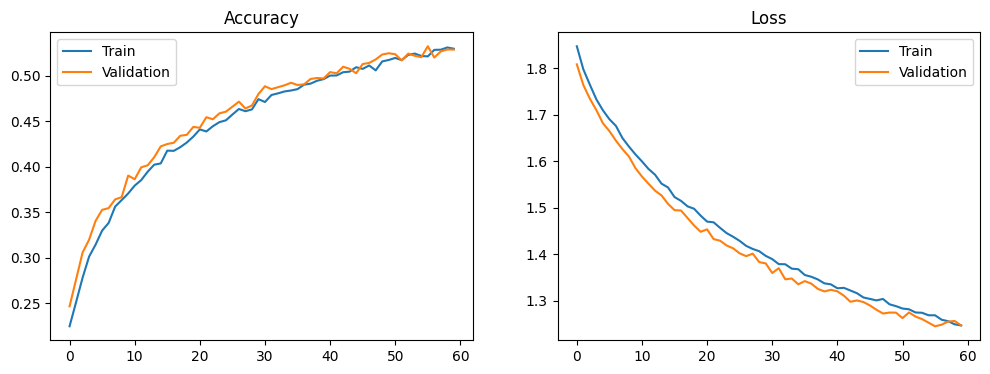

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train','Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Validation'])

plt.show()


In [20]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy : {test_acc*100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 52s 462ms/step - accuracy: 0.5474 - loss: 1.1868
Test Accuracy : 54.74%


In [21]:
model.save("emotion_cnn_fer2013_final.h5")
